In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [147]:
df = pd.read_csv('.\insurance.csv')
df_copy = df.copy()

In [148]:
df_copy.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
df_copy.shape

(1338, 7)

In [150]:
df_copy.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [151]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [152]:
df_copy.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Null values

In [153]:
df_copy.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Age

In [154]:
df_copy['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Text(0, 0.5, 'Frecuency')

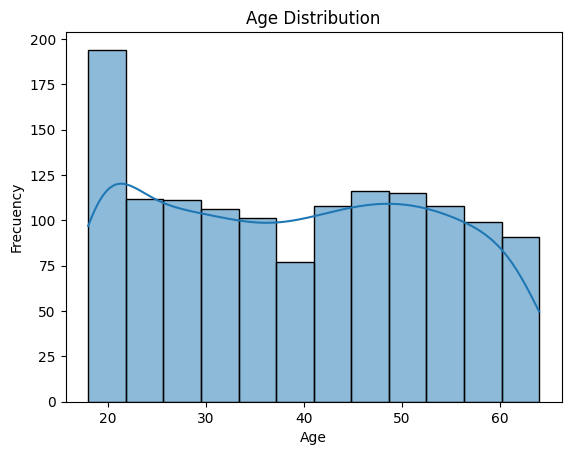

In [155]:
age_hist= sns.histplot(data=df_copy['age'], kde=True)
age_hist.set_title('Age Distribution')
age_hist.set_xlabel('Age')
age_hist.set_ylabel('Frecuency') 

Text(0.5, 1.0, 'Age Distribution')

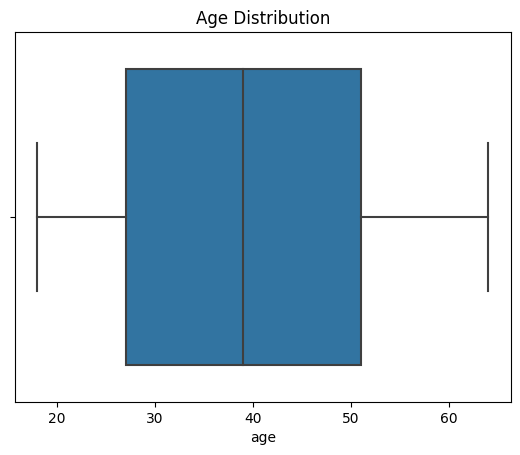

In [156]:
box_age=sns.boxplot(x='age', data=df_copy)
box_age.set_title('Age Distribution')

Sex

In [157]:
df_copy['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Text(0, 0.5, 'Frecuency')

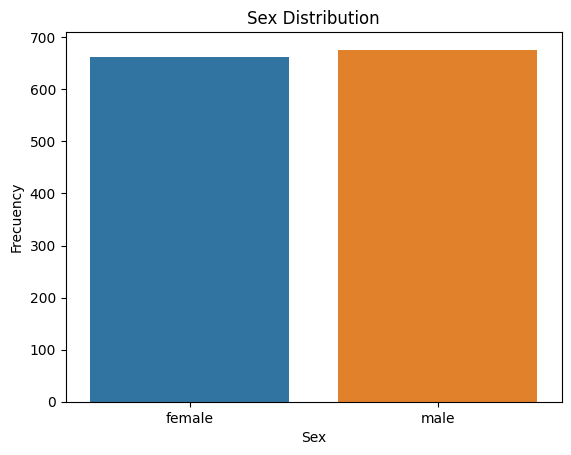

In [158]:
bar_sex=sns.countplot(x='sex', data=df_copy)
bar_sex.set_title('Sex Distribution')
bar_sex.set_xlabel('Sex')
bar_sex.set_ylabel('Frecuency') 

BMI

In [159]:
df_copy['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Text(0, 0.5, 'Frecuency')

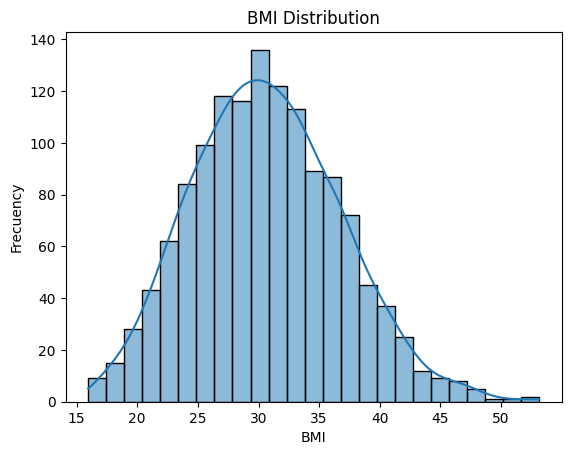

In [160]:
bmi_hist= sns.histplot(data=df_copy['bmi'], kde=True)
bmi_hist.set_title('BMI Distribution')
bmi_hist.set_xlabel('BMI')
bmi_hist.set_ylabel('Frecuency') 

Text(0.5, 1.0, 'BMI Distribution')

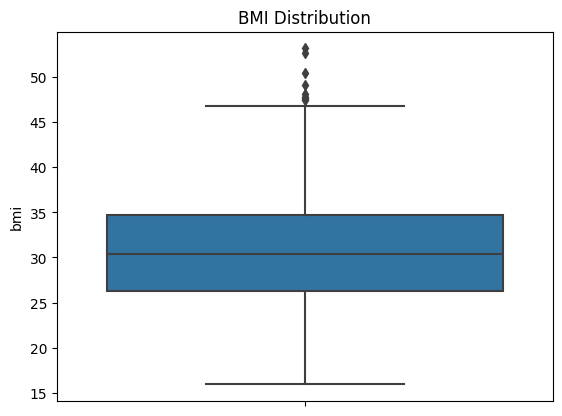

In [161]:
box_bmi=sns.boxplot(y='bmi', data=df_copy)
box_bmi.set_title('BMI Distribution')

Children

In [162]:
df_copy['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0, 0.5, 'Frecuency')

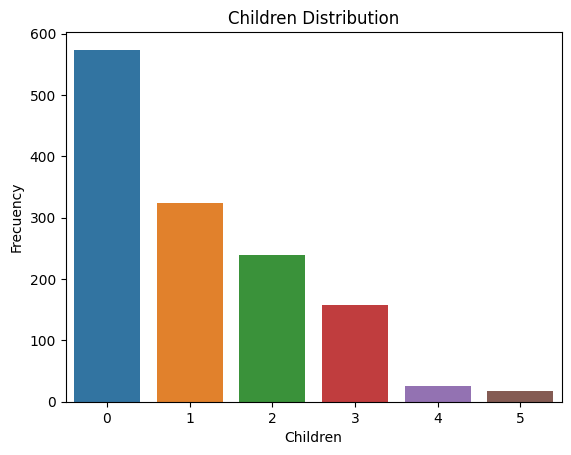

In [163]:
bar_children=sns.countplot(x='children', data=df_copy)
bar_children.set_title('Children Distribution')
bar_children.set_xlabel('Children')
bar_children.set_ylabel('Frecuency') 

Smoker

In [164]:
df_copy['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Text(0, 0.5, 'Frecuency')

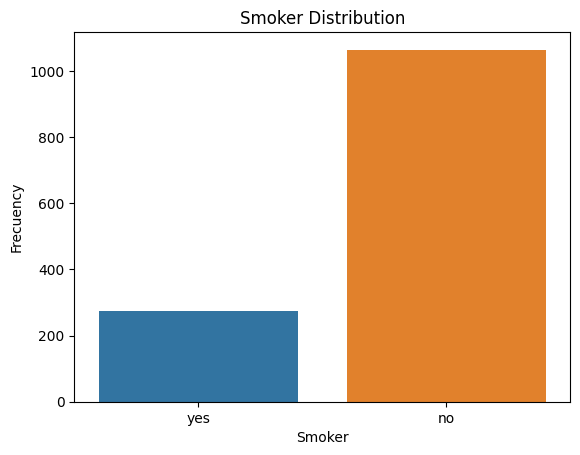

In [165]:
bar_smoker=sns.countplot(x='smoker', data=df_copy)
bar_smoker.set_title('Smoker Distribution')
bar_smoker.set_xlabel('Smoker')
bar_smoker.set_ylabel('Frecuency') 

Region

In [166]:
df_copy['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0, 0.5, 'Region')

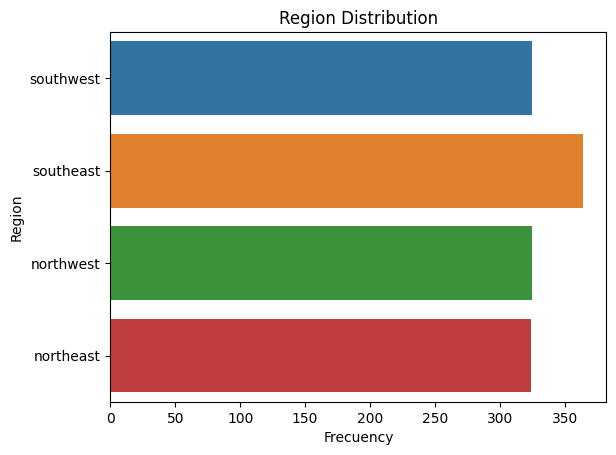

In [167]:
bar_region=sns.countplot(y='region', data=df_copy)
bar_region.set_title('Region Distribution')
bar_region.set_xlabel('Frecuency')
bar_region.set_ylabel('Region') 

Charges

In [168]:
df_copy['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Text(0, 0.5, 'Frecuency')

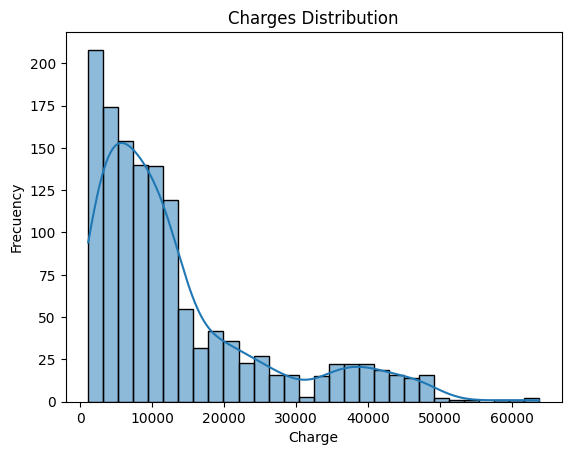

In [169]:
charges_hist= sns.histplot(data=df_copy['charges'], kde=True)
charges_hist.set_title('Charges Distribution')
charges_hist.set_xlabel('Charge')
charges_hist.set_ylabel('Frecuency') 

<Axes: xlabel='charges'>

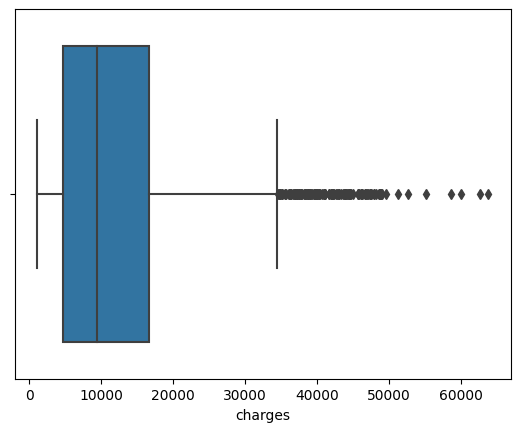

In [170]:
sns.boxplot(x='charges', data=df_copy)

In [171]:
mean_charge_by_sex= df.groupby(['sex', 'smoker'])['charges'].mean().reset_index() 
mean_charge_by_sex

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


Text(0, 0.5, 'Frecuency')

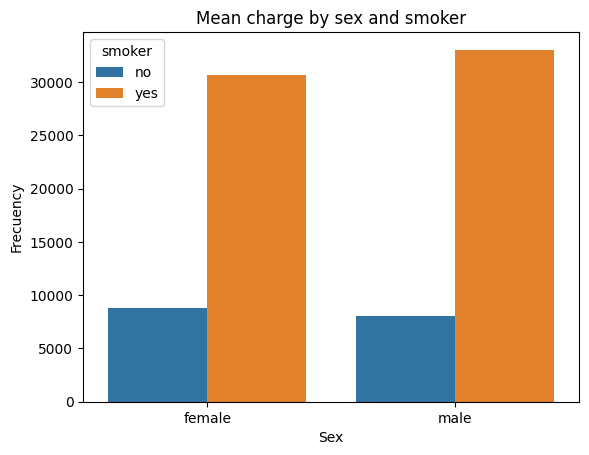

In [172]:
bar_mean_charge_by_sex=sns.barplot(x='sex', y= 'charges',hue="smoker",data=mean_charge_by_sex)
bar_mean_charge_by_sex.set_title('Mean charge by sex and smoker')
bar_mean_charge_by_sex.set_xlabel('Sex')
bar_mean_charge_by_sex.set_ylabel('Frecuency')

Text(0.5, 1.0, 'Smoker by sex')

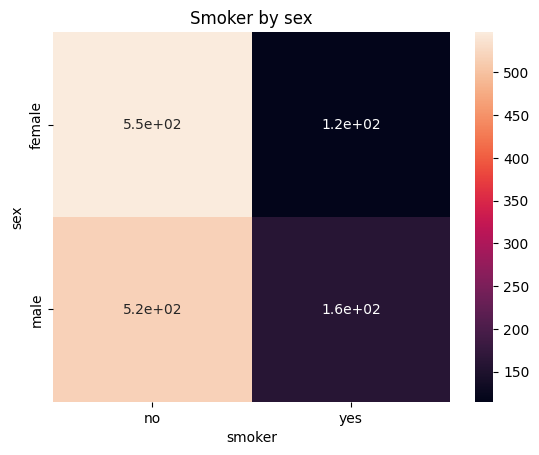

In [173]:
smoker_by_sex=pd.crosstab(df_copy['sex'], df_copy['smoker'])
heat_smoker_by_sex=sns.heatmap(smoker_by_sex ,annot=True)
heat_smoker_by_sex.set_title('Smoker by sex')

El promedio del cargo no varía en gran medida entre hombre y mujeres, pero si hay una gran diferencia de más del 100% entre fumadores y no fumadores. Los fumadores pagan una prima mayor que los no fumadores. 

In [174]:
mean_charge_by_region= df.groupby(['region'])['charges'].mean().reset_index() 
mean_charge_by_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


Text(0, 0.5, 'Frecuency')

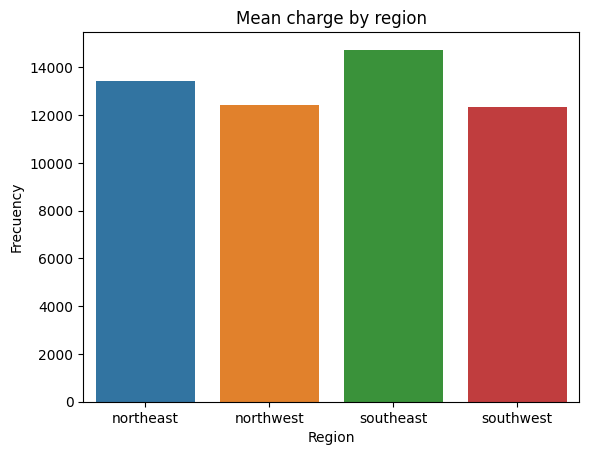

In [175]:
bar_mean_charge_by_region=sns.barplot(x='region', y= 'charges',data=mean_charge_by_region)
bar_mean_charge_by_region.set_title('Mean charge by region')
bar_mean_charge_by_region.set_xlabel('Region')
bar_mean_charge_by_region.set_ylabel('Frecuency')

Los promedios de las diferentes regiones varian desde 12.000 a 14.700. La region que tiene la prima mas alta es la region sureste, y la mas menor la region suroeste.

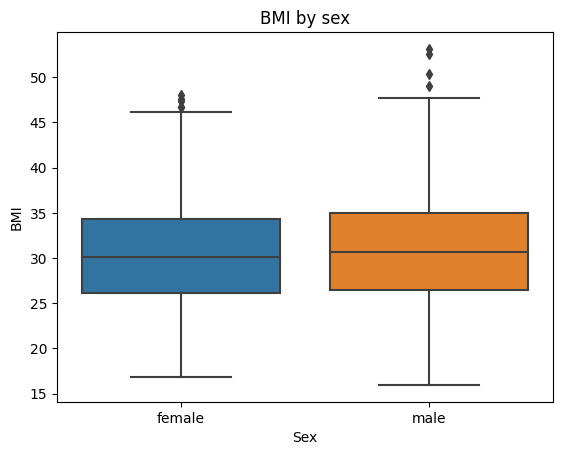

In [176]:
bmi_by_sex=sns.boxplot(x="sex",y="bmi", data=df_copy).set(title="BMI by sex",xlabel='Sex',ylabel='BMI')

La media del índice de masa corporal en el hombre es levemente más alto que el de las mujeres. En los hombres se observan registros con un índice mayor a 50 mientras que en las mujeres ninguno supera ese número. 

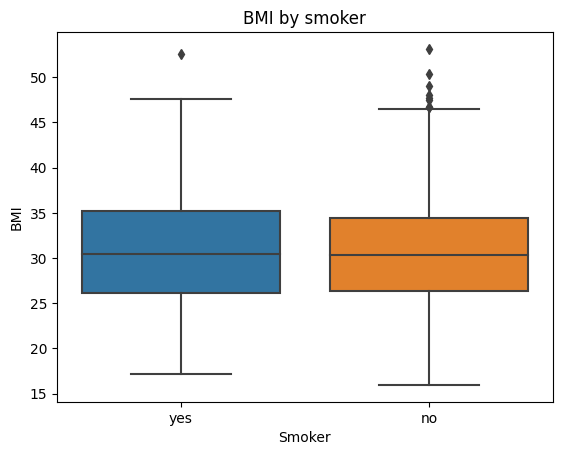

In [177]:
bmi_by_smoker=sns.boxplot(x="smoker",y="bmi", data=df_copy).set(title="BMI by smoker",xlabel='Smoker',ylabel='BMI')

Text(0, 0.5, 'Charge')

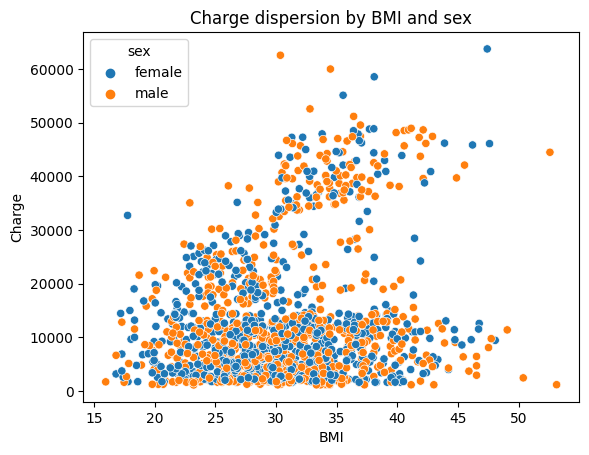

In [178]:
disp_bmi_by_charge=sns.scatterplot(data=df_copy, x="bmi", y="charges", hue='sex')
disp_bmi_by_charge.set_title('Charge dispersion by BMI and sex')
disp_bmi_by_charge.set_xlabel('BMI')
disp_bmi_by_charge.set_ylabel('Charge')

Correlation

In [179]:
df_corr= df[['age', 'bmi', 'charges']]
df_corr.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


Text(0.5, 1.0, 'Correlation')

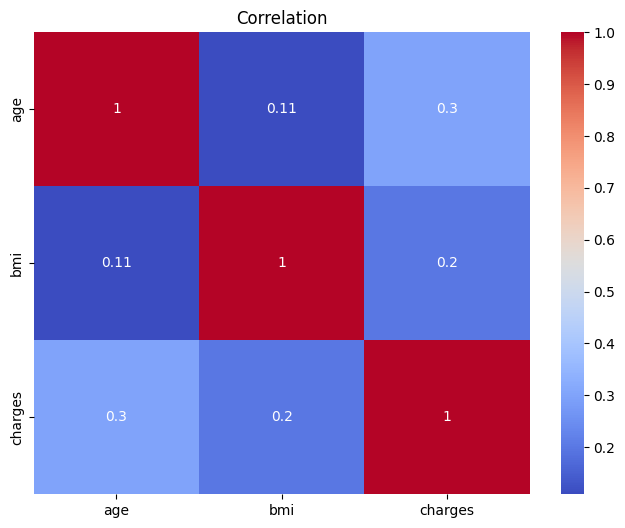

In [180]:
plt.figure(figsize=(8,6))
corr_heatmap=sns.heatmap(df_corr.corr(),cbar= True, cmap='coolwarm', annot = True)
plt.title('Correlation')

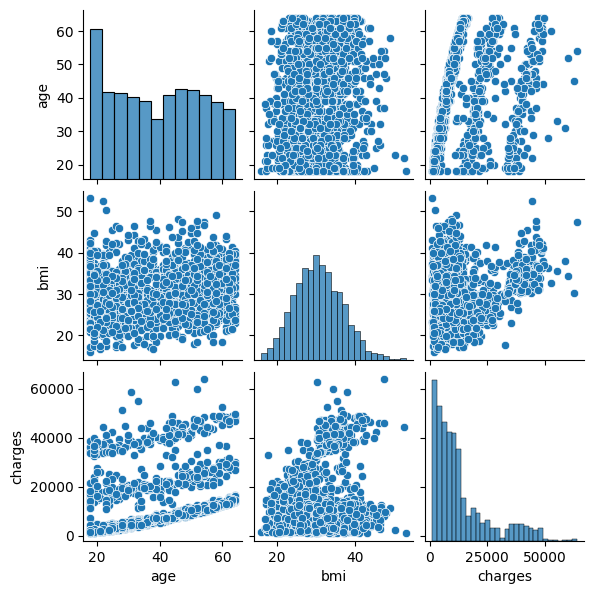

In [181]:
pair_plot=sns.pairplot(df_corr, height=2)

Simple linear regression

In [182]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['charges'])
    train_set_y= train_set['charges']
    test_set_x=test_set.drop(columns=['charges'])
    test_set_y= test_set['charges']
    return train_set_x, train_set_y, test_set_x, test_set_y

In [183]:
df_lr= pd.DataFrame(df_copy[['age', 'charges']])
df_lr['charges']=df_lr['charges'].apply(lambda x: int(x))
df_lr.head(5)

,age,charges
0,19,16884
1,18,1725
2,28,4449
3,33,21984
4,32,3866


In [184]:
train_set_x_lrs, train_set_y_lrs, test_set_x_lrs, test_set_y_lrs= split_train_test(df_lr)

In [185]:
linearRegression_simple= LinearRegression()

In [186]:
linearRegression_simple.fit(train_set_x_lrs.values.reshape(-1,1), train_set_y_lrs.values)

LinearRegression()

In [187]:
linearRegression_simple.intercept_

2820.817147207523

In [188]:
linearRegression_simple.coef_ 

array([264.77909763])

In [189]:
x_min_max=np.array([[df_lr['age'].min()], [df_lr['age'].max()]])
y_predict=linearRegression_simple.predict(x_min_max)

In [190]:
print(x_min_max)
print(y_predict)

[[18]
 [64]]
[ 7586.84090448 19766.67939528]


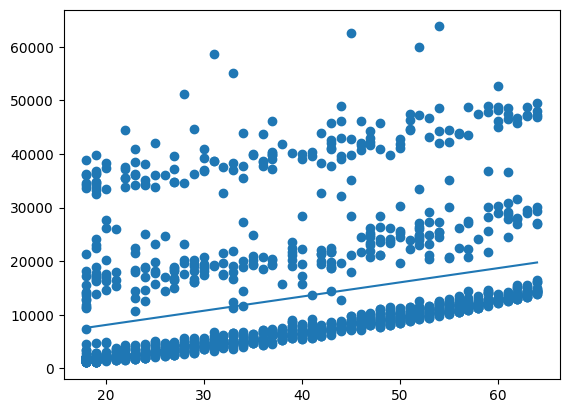

In [191]:
plt.plot(x_min_max,y_predict )
plt.scatter(df_copy['age'], df_copy['charges'])
plt.show()

In [192]:
y_predict_rls= linearRegression_simple.predict(test_set_x_lrs.values.reshape(-1,1))

In [211]:
lin_simp_mse = mean_squared_error(test_set_y_lrs,y_predict_rls)
lin_simp_rmse=np.sqrt(lin_simp_mse)
print(f"El error del modelo simple es: {round(lin_simp_rmse, 2)}")
print('R2 score: ',r2_score(test_set_y_lrs,y_predict_rls))

El error del modelo simple es: 11629.08
R2 score:  0.08134435982826604


Multiple linear model

In [194]:
df_copy['charges']=df_copy['charges'].apply(lambda x: int(x))
df_copy['bmi']=df_copy['bmi'].apply(lambda x: int(x))

In [195]:
df_copy.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27,0,yes,southwest,16884
1,18,male,33,1,no,southeast,1725
2,28,male,33,3,no,southeast,4449
3,33,male,22,0,no,northwest,21984
4,32,male,28,0,no,northwest,3866


In [196]:
df_modified =pd.get_dummies(df_copy, columns=['sex', 'smoker', 'region'])

In [197]:
train_set_x, train_set_y, test_set_x, test_set_y= split_train_test(df_modified)

In [198]:
multiple_linear_model = LinearRegression()

In [199]:
multiple_linear_model.fit(train_set_x,train_set_y.values.reshape(-1, 1))

LinearRegression()

In [200]:
coefs=multiple_linear_model.coef_
coef_rounded = [np.round(x,2) for x in coefs]
coef_rounded

[array([   261.64,    348.49,    582.76,    209.74,   -209.74, -11860.04,
         11860.04,    618.87,    204.36,   -409.32,   -413.92])]

In [201]:
intercept=multiple_linear_model.intercept_
inter_rounded=[np.round(x,2) for x in intercept]
inter_rounded

[-1289.77]

In [202]:
test_pred_y_mr=multiple_linear_model.predict(test_set_x)
mult_regr_mse = mean_squared_error(test_set_y,test_pred_y_mr)
mult_line_rmse=np.sqrt(mult_regr_mse)
print(f"El error del modelo multiple es: {round(mult_line_rmse, 2)}")
print('R2 score: ',r2_score(test_set_y,test_pred_y_mr))

El error del modelo multiple es: 6224.98
R2 score:  0.7367683931568916


Decision Tree Regressor

In [203]:
reg_tree= DecisionTreeRegressor(random_state=20)
scores_regr_tree= cross_val_score(reg_tree, train_set_x, train_set_y, scoring='neg_mean_squared_error', cv=10)
rmse_scores= np.sqrt(-scores_regr_tree)
print('RMSE: ', [round(x,2) for x in rmse_scores])
print('RMSE mean: ',round(rmse_scores.mean(),2))
print('Standar desviation: ',round(rmse_scores.std(),2))

RMSE:  [5931.0, 6385.9, 6593.72, 6430.25, 5983.26, 6193.71, 5372.51, 7725.34, 5775.45, 5857.45]
RMSE mean:  6224.86
Standar desviation:  605.37


Decision Tree Regressor: Cross Validation

In [204]:
params = {'criterion':['squared_error'],'max_depth':[2,3,4,5,6,7,8,9,10,11], 'splitter':['best', 'random']}
Rcv_regr_tree= RandomizedSearchCV(estimator=reg_tree,param_distributions=params, scoring='neg_mean_squared_error', cv=10 )
Rcv_regr_tree.fit(train_set_x, train_set_y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=20),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [205]:
print(Rcv_regr_tree.best_params_)
best_score= Rcv_regr_tree.best_score_
best_rmse= np.sqrt(-best_score)
print(round(best_rmse, 2))

{'splitter': 'best', 'max_depth': 3, 'criterion': 'squared_error'}
4695.75


In [214]:
best_tree=DecisionTreeRegressor(criterion='squared_error',max_depth=6, random_state=20, splitter= 'best')
best_tree.fit(train_set_x, train_set_y)
predict_y_best_tree= best_tree.predict(test_set_x)
best_tree_mse = mean_squared_error(test_set_y,predict_y_best_tree)
best_tree_rmse=np.sqrt(best_tree_mse)
print(f"El error del modelo 'Decision Tree': {round(best_tree_rmse, 2)}")
print('R2 score: ',r2_score(test_set_y,predict_y_best_tree))


El error del modelo 'Decision Tree': 5128.07
R2 score:  0.8213634533013768


Random Forest Regressor

In [207]:
forest_regr= RandomForestRegressor()
param_rf = { "criterion" : ['squared_error'], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50,100] }

Rcv_random_forest= RandomizedSearchCV(estimator=forest_regr,param_distributions=param_rf, scoring='neg_mean_squared_error', n_iter=10  )
Rcv_random_forest.fit(train_set_x, train_set_y)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 16],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring='neg_mean_squared_error')

In [208]:
print(Rcv_random_forest.best_params_)
best_score= Rcv_random_forest.best_score_
best_rmse= np.sqrt(-best_score)
print(round(best_rmse, 2))

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 10, 'criterion': 'squared_error'}
4485.34


In [213]:
best_random_fores=RandomForestRegressor(criterion='squared_error', random_state=20,n_estimators= 100, min_samples_split= 12,min_samples_leaf= 10,)
best_random_fores.fit(train_set_x, train_set_y)
predict_y_best_random_forest= best_random_fores.predict(test_set_x)
best_rf_mse = mean_squared_error(test_set_y,predict_y_best_random_forest)
best_rf_rmse=np.sqrt(best_rf_mse)
print(f"El error del modelo 'Random Forest': {round(best_rf_rmse, 2)}")
print('R2 score: ',r2_score(test_set_y,predict_y_best_random_forest))


El error del modelo 'Random Forest': 4758.13
R2 score:  0.8462077115826674
